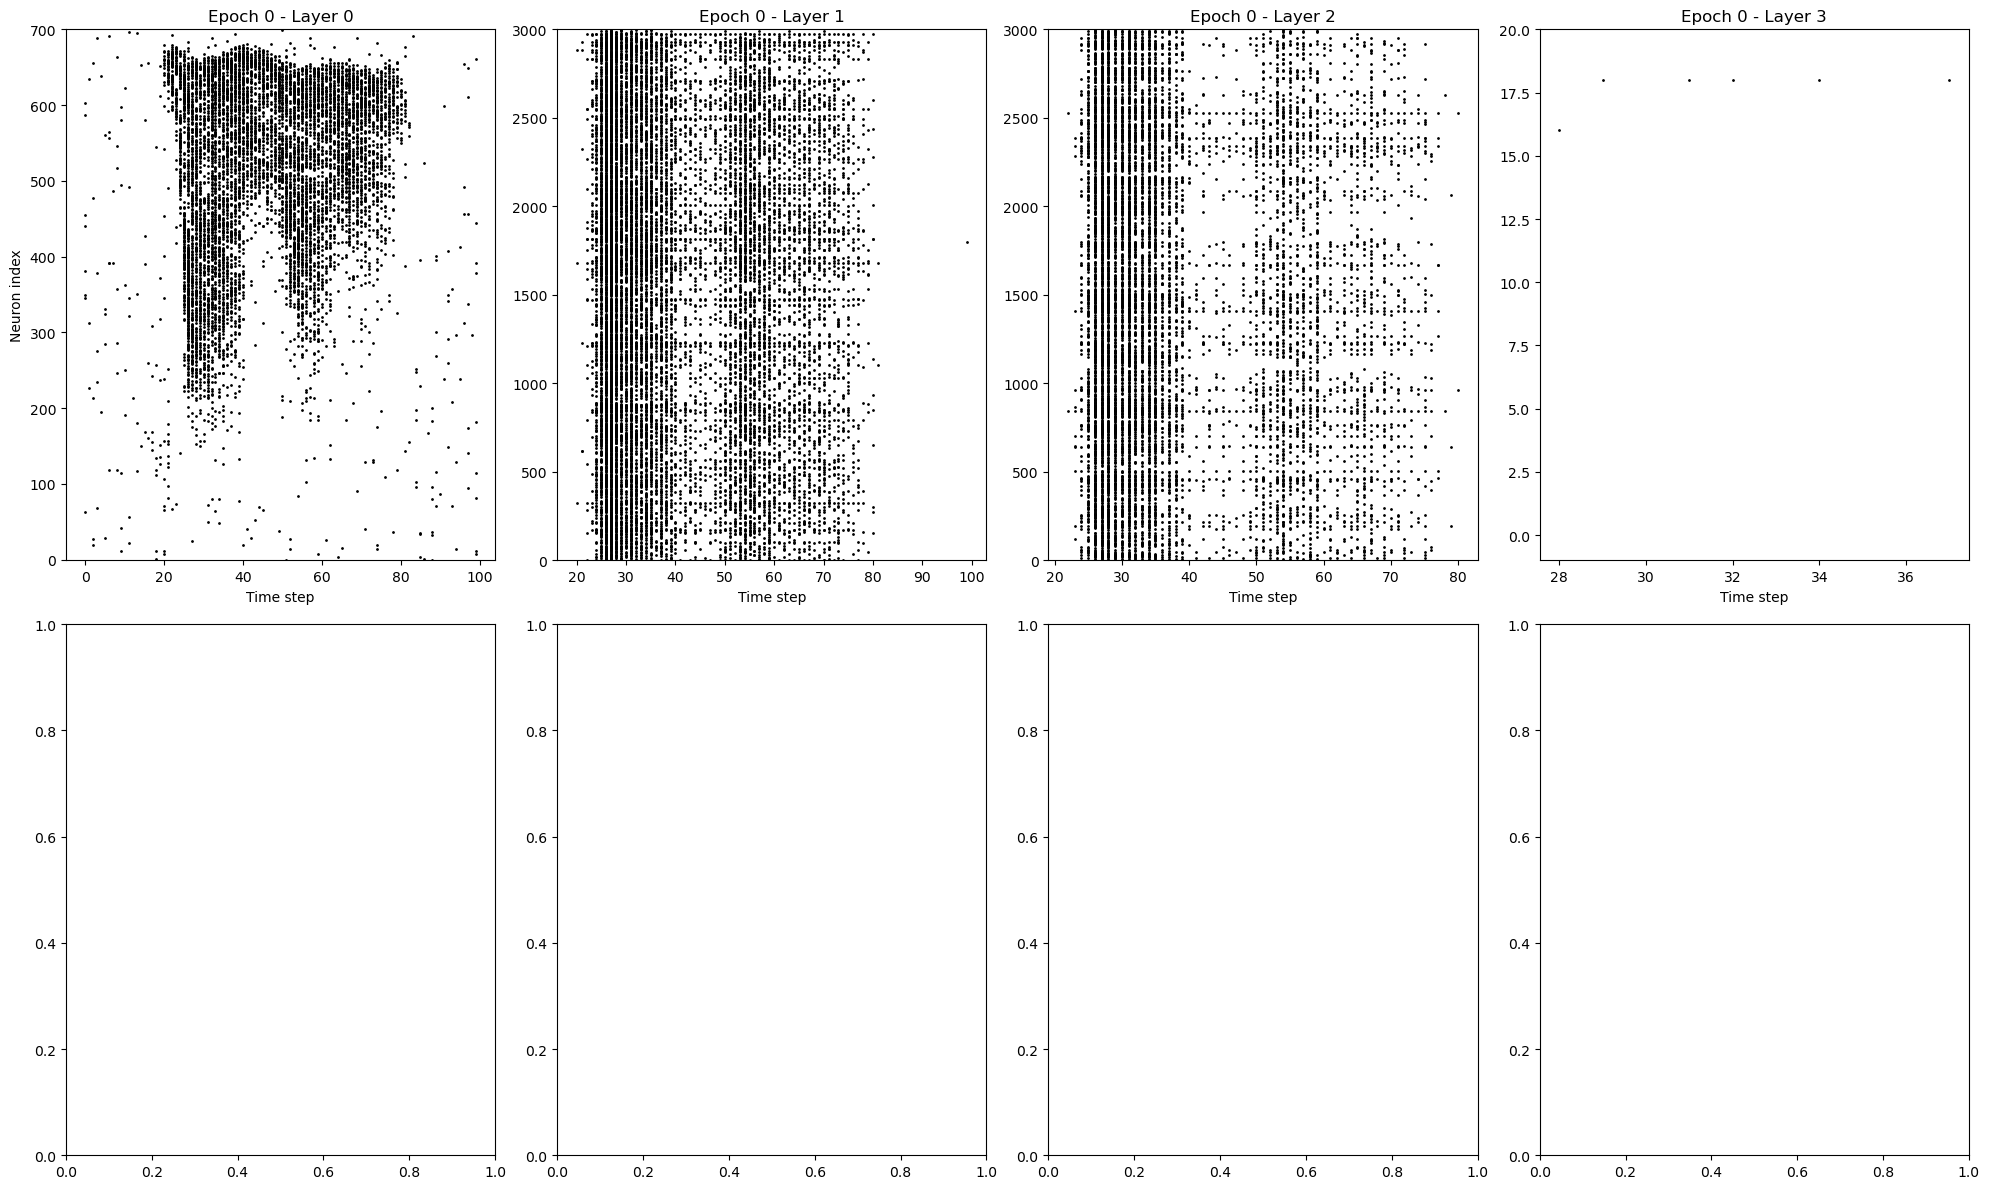

In [7]:
from util.plot_layer_development import plot_layer_development
from glob import glob
import copy
from constants import NUMBER_INPUT_NEURONS, NUMBER_OUTPUT_NEURONS, TIME_STEPS
from neural_nets.configurable_spiking_neural_net import ConfigurableSpikingNeuralNet
import torch

NUMBER_HIDDEN_NEURONS = 3000
NUMBER_HIDDEN_LAYER = 2
beta = 0.8
threshold = 1

base_net =  ConfigurableSpikingNeuralNet(number_input_neurons=NUMBER_INPUT_NEURONS,
                                                    number_hidden_neurons=NUMBER_HIDDEN_NEURONS,
                                                    number_output_neurons=NUMBER_OUTPUT_NEURONS,
                                                    beta=beta,
                                                    threshold=threshold,
                                                    time_steps=TIME_STEPS,
                                                    number_hidden_layers=NUMBER_HIDDEN_LAYER)

all_point_of_chaos_models = glob('./models/experiment_point_of_chaos/*.pth')

results = []

for model_path in all_point_of_chaos_models:
    epoch = result = model_path.split('epoch_')[-1].replace(".pth", "")

    model = copy.deepcopy(base_net)
    model.load_state_dict(torch.load(model_path))
    results.append([epoch, model])

results = sorted(results, key=lambda key: key[0])

epochs = [value[0] for value in results]
models = [value[1] for value in results]

plot_layer_development(models, [f'Epoch {epoch}' for epoch in epochs])